In [1]:
! pip install voronoi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 102.6 kB/s eta 0:00:00m eta 0:00:010:00:01


In [2]:
import matplotlib.pyplot as plt 

In [3]:
from voronoi.point import Point
from voronoi.segment import Segment
from voronoi.diagram import Diagram
from voronoi.faces import Vertex

In [82]:
def delete_vertex(vertex, obstacles):
    vertex = [vertex.x, vertex.y]
    dlt_veretx = False
    for obs in obstacles:
        dlt_veretx = vertex in obs
        if dlt_veretx:
            break
    return dlt_veretx


In [67]:
obstacles = [[[-2,-2],[8,-2], [8,8], [-2,8]],[[0,0],[2,0], [2,2], [0,2]],[[3,3],[6,3], [6,6], [3,6]]]

In [55]:
segments = []

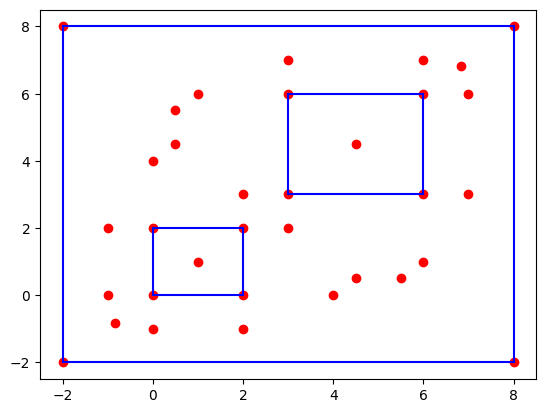

In [56]:
for obstacle in obstacles:
    for ix in range(0,len(obstacle)-1):
        p1 = obstacle[ix]
        p2 = obstacle[ix+1]
        plt.plot([p1[0],p2[0]], [p1[1],p2[1]],  color = 'blue')
        segments.append(Segment(Point(p1[0],p1[1]),Point(p2[0],p2[1])))

    p1 = obstacle[0]
    p2 = obstacle[-1]
    plt.plot([p1[0],p2[0]], [p1[1],p2[1]],  color = 'blue')
    segments.append(Segment(Point(p1[0],p1[1]),Point(p2[0],p2[1])))

diagram = Diagram()
diagram.construct([], segments)

filtered_edges = [edge for edge in diagram.edges if edge.is_finite and edge.is_primary]

for edge in filtered_edges:
    start = edge.start
    end = edge.end

    if delete_vertex(start, obstacles) or delete_vertex(end, obstacles):
        pass
    else:
        plt.plot([start.x, end.x],[start.y, end.y], color='blue')

plt.show()